# 5.7 专题：支持向量机

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# 用Seaborn画图
import seaborn as sns; sns.set()

## 5.7.1 支持向量机的由来

In [3]:
from sklearn.datasets.samples_generator import make_blobs

In [4]:
x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

make_blobs函数是为聚类产生数据集

产生一个数据集和相应的标签

n_samples:表示数据样本点个数,默认值100

n_features:表示数据的维度，默认值是2

centers:产生数据的中心点，默认值3

cluster_std：数据集的标准差，浮点数或者浮点数序列，默认值1.0

center_box：中心确定之后的数据边界，默认值(-10.0, 10.0)

shuffle ：洗乱，默认值是True

random_state:官网解释是随机生成器的种子

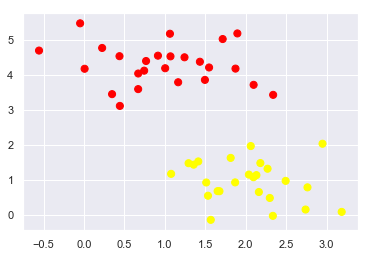

In [5]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

在这两种类型之间，有不止一条直线可以将他们完美分割

In [6]:
xfit = np.linspace(-1, 3.5)

(-1, 3.5)

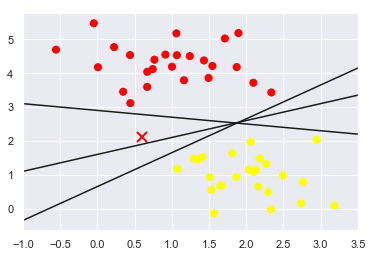

In [7]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, 'k')
    
plt.xlim(-1, 3.5)

## 5.7.2 支持向量机：边界最大化

不再画一条直线来区分类型，而是画一条到最近点边界、有宽度的线条。

In [8]:
xfit = np.linspace(-1, 3.5)

(-1, 3.5)

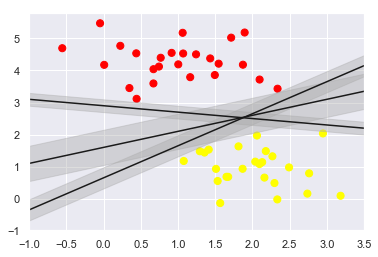

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

在支持向量机中，选择边界最大的那条线是模型的最优解，支持向量机其实就是一个边界最大化评估期。

1. 拟合支持向量机

In [10]:
from sklearn.svm import SVC

In [11]:
model = SVC(kernel='linear', C=1E10)

In [12]:
model.fit(x, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """画二维SVC的决策函数"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建评估模型的网络
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    p = model.decision_function(xy).reshape(X.shape)
    temp = model.decision_function(model.support_vectors_)
    
    # 画决策边界和边界
    ax.contour(X, Y, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # 画支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='none', edgecolors='black')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


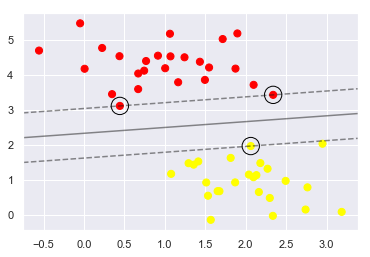

In [14]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

支持向量的坐标

In [15]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [16]:
def plot_svm(N=10, ax=None):
    x, y = make_blobs(n_samples=N, centers=2, random_state=0, cluster_std=0.60)
    
    x = x[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(x, y)
    
    ax = ax or plt.gca()
    ax.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    

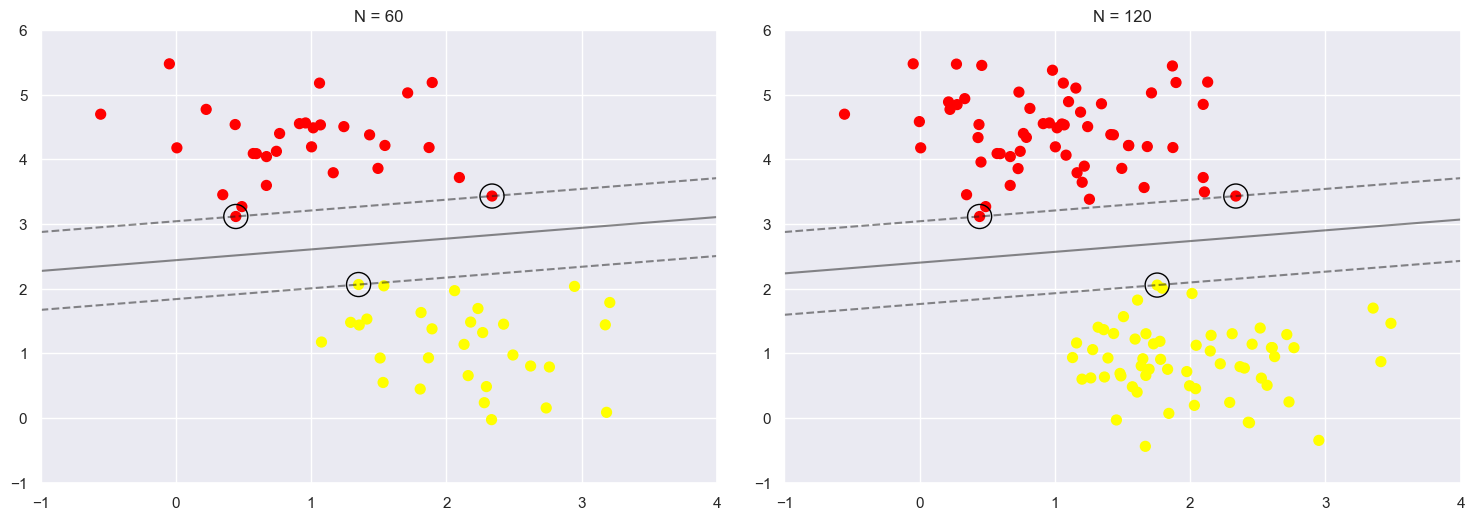

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), dpi=100)
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

SVM模型的优点之一：对远离边界的数据点不敏感。

In [18]:
from ipywidgets import interact, fixed
import IPython
%matplotlib --list

Available matplotlib backends: ['qt5', 'agg', 'wx', 'inline', 'qt', 'gtk', 'nbagg', 'pdf', 'ps', 'qt4', 'notebook', 'ipympl', 'widget', 'svg', 'tk', 'osx', 'gtk3']


In [19]:
%matplotlib inline

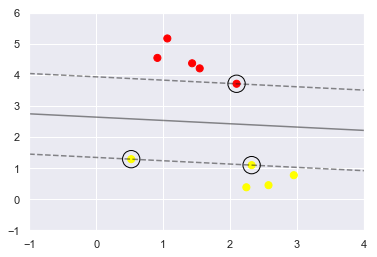

<function __main__.plot_svm(N=10, ax=None)>

In [20]:
interact(plot_svm, N=[10, 200], ax=fixed(None))

2. 超越线性边界：核函数SVM模型

为了应用核函数，引入一些非线性可分的数据

In [21]:
from sklearn.datasets.samples_generator import make_circles

In [31]:
x, y = make_circles(100, factor=.1, noise=.1)

In [32]:
clf = SVC(kernel='linear').fit(x, y)

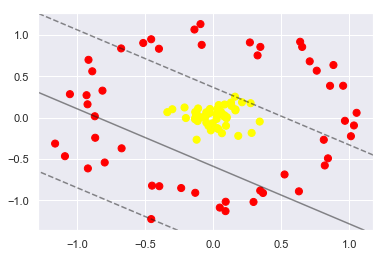

In [33]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [34]:
r = np.exp(-(x ** 2).sum(1))

In [37]:
from mpl_toolkits import mplot3d

In [40]:
def plot_3d(elev=30, azim=30, x=x, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(x[:, 0], x[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

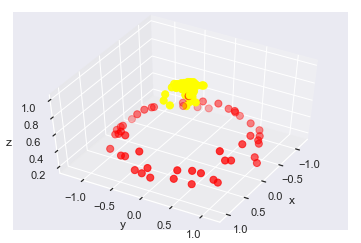

<function __main__.plot_3d(elev=30, azim=30, x=array([[-0.04639653,  0.03997602],
       [-0.00337309, -0.06997711],
       [ 1.05461137,  0.05714873],
       [-0.2098547 ,  0.12164008],
       [ 0.28323492, -0.18625625],
       [-0.39521222, -0.83037698],
       [-0.29973219,  0.10034885],
       [ 1.03499622, -0.09593212],
       [ 0.76160877,  0.56680265],
       [ 0.13129174,  0.18162904],
       [ 0.06476691, -0.18950328],
       [ 0.63980311,  0.91650756],
       [-0.33641048,  0.06516184],
       [ 0.71016613,  0.67953195],
       [ 0.09130146, -1.13194027],
       [ 0.02342842,  0.04120175],
       [ 0.36685599, -0.91265557],
       [ 0.21250771,  0.18478098],
       [ 0.63066018, -0.89262425],
       [ 0.08401966,  0.15746929],
       [-0.02330554,  0.10353688],
       [ 0.02963146, -0.12773712],
       [-0.02494412,  0.05587328],
       [-0.44883442, -0.82390087],
       [ 0.08423279,  0.02665201],
       [-0.13118029, -0.9103973 ],
       [ 0.04498464,  0.04642224],
       [

In [48]:
interact(plot_3d, elev=[50, 90], azip=(-180, 180), x=fixed(x), y=fixed(y))

计算基函数在数据集上每个点的变化结果，让SVM算法从所有结果中筛选出最优解。这种基函数变换方式被称为核变换，是基于每对数据点之间的相似度计算的。

我们可以应用核函数化的SVM模型将线性核转变为RBF（径向基函数）核，设置kernel模型超参数即可。

In [49]:
clf = SVC(kernel='rbf', C=1E6)

In [50]:
clf.fit(x, y)

d:\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

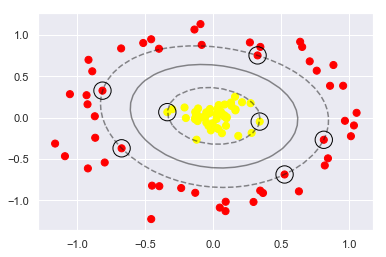

In [51]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

3. SVM优化：软化边界

In [52]:
x, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

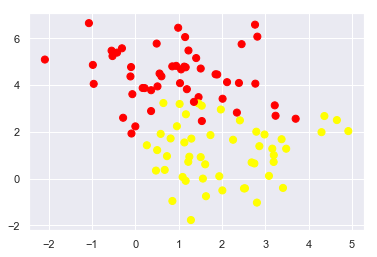

In [53]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

显示了不同参数C通过软化边界线，对拟合效果产生的影响。

In [54]:
x, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

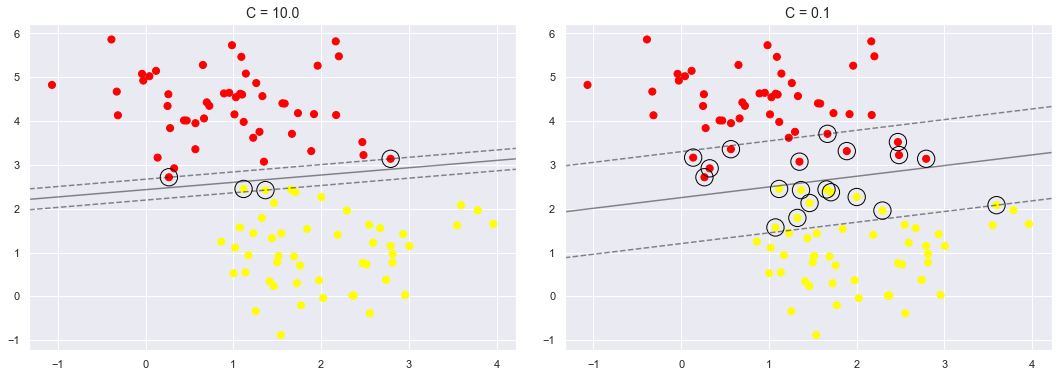

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(x, y)
    axi.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolor='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## 5.7.3 案例：人脸识别

In [57]:
from sklearn.datasets import fetch_lfw_people

In [58]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [59]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [60]:
faces.images.shape

(1348, 62, 47)

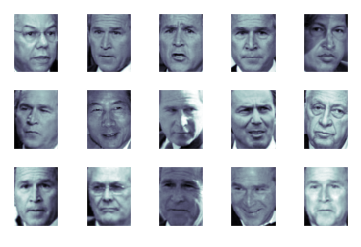

In [116]:
fig, ax = plt.subplots(3, 5)
fig.subplots_adjust(wspace=0.6)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(faces.target_names[faces.target[i]].split()[-1], color='white')

这里使用主成分分析来提取150个基本元素，然后将其提供给支持向量机分类器。

In [83]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [84]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

用网格搜索交叉验证来寻找最优参数组合。

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = {'svc__C': [1, 5, 10, 50],
             'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [89]:
%time grid.fit(xtrain, ytrain)

d:\python35\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 22.9 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
  

In [90]:
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

In [91]:
grid.best_score_

0.811078140454995

In [92]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

最优参数最终落在了网格的中间位置，如果它们落在了边缘位置，我们可能就需要扩展网格搜索范围，确保最优参数可以被搜索到。

In [93]:
model = grid.best_estimator_

In [94]:
yfit = model.predict(xtest)

Text(0.5,0.98,'Predicted Names; Incorrect Labels in Red')

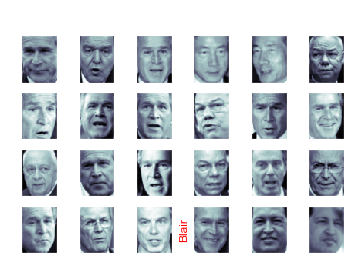

In [102]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='white' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14, color='white')

In [108]:
faces.target_names[yfit[0]].split()[-1]

'Bush'

打印分类效果报告

In [117]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



还可以画出这些标签的混淆矩阵

In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
mat = confusion_matrix(ytest, yfit)

Text(123.75,0.5,'predicted label')

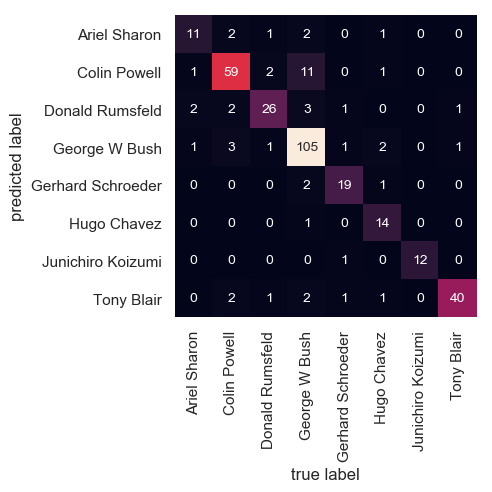

In [123]:
plt.figure(dpi=100)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

mat.T是为了让x轴为true label，y轴为predicted label

## 5.7.4 支持向量机总结